In [6]:
import pandas as pd
import numpy as np
import scipy.interpolate
%matplotlib inline
import matplotlib.pyplot as plt
df = pd.read_csv("ML.csv")

# Data explore

In [8]:
df.describe()

,PQ,Wat1,Wat2,Wat3
count,38263.000000,38263.000000,38263.000000,38263.000000
mean,85.637736,266.450157,12.085184,33.217681
std,36.397766,83.915217,6.663876,17.905039
min,23.925477,4.208349,5.457476,5.093697
25%,52.527045,209.413318,7.887610,11.652755
50%,83.911690,287.767570,9.725196,34.955292
75%,107.535034,340.330472,13.861624,45.967332
max,234.787097,398.890936,50.073908,101.195053


Text(0, 0.5, 'Wat3')

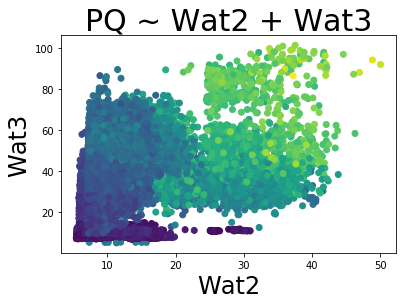

In [9]:
plt.scatter('Wat2', 'Wat3', c='PQ', data=df)
plt.title('PQ ~ Wat2 + Wat3', size=30)
plt.xlabel('Wat2', size=24)
plt.ylabel('Wat3', size=24)

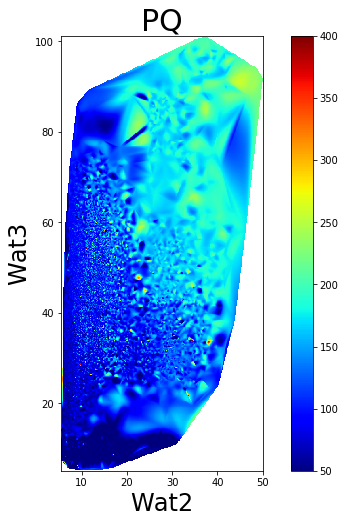

In [10]:
fig = plt.figure(figsize=(10, 8))
x = df.loc[:,'Wat2'].values
y = df.loc[:,'Wat3'].values
z = df.loc[:,'PQ'].values

N = 500
xll = x.min();  xul = x.max();  yll = y.min();  yul = y.max()

xi = np.linspace(xll, xul, N)
yi = np.linspace(yll, yul, N)
zi = scipy.interpolate.griddata((x, y), z, (xi[None,:], yi[:,None]), method='cubic')

plt.imshow(zi, extent=[xll, xul, yll, yul], origin='grey', cmap=plt.cm.jet, alpha=1)
plt.title('PQ', size=30)
plt.xlabel('Wat2', size=24)
plt.ylabel('Wat3', size=24)
plt.colorbar()
plt.clim(50,400)
plt.show()

Text(0, 0.5, 'Wat2')

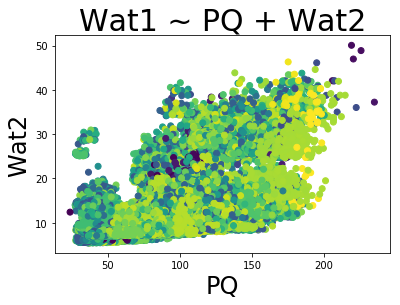

In [11]:
plt.scatter('PQ', 'Wat2', c='Wat1', data=df)
plt.title('Wat1 ~ PQ + Wat2', size=30)
plt.xlabel('PQ', size=24)
plt.ylabel('Wat2', size=24)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38263 entries, 0 to 38262
Data columns (total 5 columns):
time    38263 non-null object
PQ      38263 non-null float64
Wat1    38263 non-null float64
Wat2    38263 non-null float64
Wat3    38263 non-null float64
dtypes: float64(4), object(1)
memory usage: 1.5+ MB


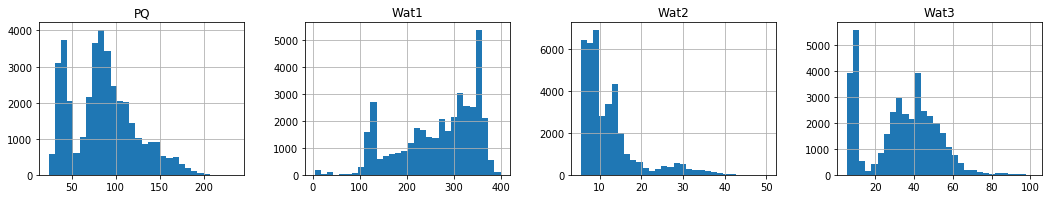

In [13]:
scale = 2.75
df.hist(bins=30, figsize=(10*scale,5*scale), layout=(4,6))
plt.show()

# Machine learning

In [2]:
y = np.array(df.PQ)
X = np.array(df.drop(['PQ'], axis=1))

print(y.shape)
print(X.shape)

(26674,)
(26674, 3)


In [58]:
X

array([[113.59023097,  13.86863366,  24.58051751],
       [113.52015424,  19.61345031,  27.10502806],
       [281.70979007,  13.45229885,  25.33291163],
       ...,
       [316.86315272,   8.50245234,  21.08906098],
       [316.93921448,   7.42434546,  20.78737133],
       [316.72605734,   7.27163774,  21.16471507]])

In [3]:
np.random.seed(42) # to make this notebook's output stable across runs

shuffle_index = np.random.permutation(26674)
X, y = X[shuffle_index], y[shuffle_index]
y

array([ 97.89868625,  33.01534901, 138.0691149 , ...,  84.50694518,
        40.861329  ,  80.61007771])

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
y_train

array([ 47.19514994,  92.85677987,  89.75450659, ...,  84.32911455,
        73.04224168, 114.74378147])

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg.intercept_, lin_reg.coef_

(13.86845567519292, array([1.61326993e-03, 1.72271575e+00, 1.60992160e+00]))

In [14]:
lin_reg.predict(X_val)

array([ 38.19989441,  54.01340753, 100.17893475, ...,  69.44731134,
       127.10418533,  74.42786119])

In [15]:
y_val

array([ 37.77600243,  41.39455186,  75.23718974, ...,  74.9125944 ,
       173.55489051,  80.32359909])

In [6]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)

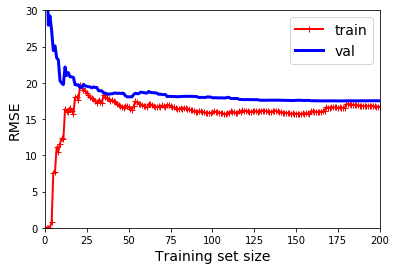

In [15]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 200, 0, 30])                     
plt.show()   

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
plot_learning_curves(ridge_reg, X, y)
plt.axis([0, 100, 0, 30])                     
plt.show()   

In [ ]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
plot_learning_curves(elastic_net, X, y)
plt.axis([0, 100, 0, 30])                     
plt.show()   

In [7]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gbrt = GradientBoostingRegressor(max_depth=2,
                                 n_estimators=50,
                                 learning_rate=0.3,
                                 random_state=42) # more overfit, higher learning rate, n_estimators, max_depth
plot_learning_curves(gbrt, X, y)
plt.axis([0, 100, 0, 30])                     
plt.show() 

In [8]:
gbrt = GradientBoostingRegressor(max_depth=2,
                                 learning_rate=0.3,
                                 n_estimators=50,
                                 random_state=42)

gbrt.fit(X_train, y_train)
print(gbrt.feature_importances_)

[0.01095476 0.18959183 0.79945341]


In [9]:
from sklearn.metrics import mean_squared_error
errors = [mean_squared_error(y_val, y_pred)
          for y_pred in gbrt.staged_predict(X_val)]

best_MSE = np.min(errors)
best_n_estimators = np.argmin(errors)
print("min MSE: {:.4f}, number of trees: {}"
      .format(best_MSE, best_n_estimators))

min MSE: 226.0318, number of trees: 47


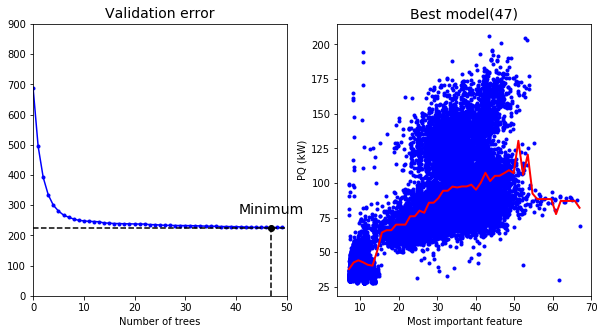

In [17]:
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.plot(errors, "b.-")
plt.plot([best_n_estimators, best_n_estimators], [0, best_MSE], "k--")
plt.plot([0, 50], [best_MSE, best_MSE], "k--")
plt.plot(best_n_estimators, best_MSE, "ko")
plt.text(best_n_estimators, best_MSE*1.2, "Minimum", ha="center", fontsize=14)
plt.axis([0, 50, 0, 900])
plt.xlabel("Number of trees")
plt.title("Validation error", fontsize=14)

plt.subplot(122)
gbrt.set_params(n_estimators=best_n_estimators).fit(X[:,2:], y)
X_new = np.linspace(min(X[:,2:]), max(X[:,2:]), 50)
ypred = gbrt.predict(X_new)
plt.plot(X[:,2:], y, "b.")
plt.plot(X_new, ypred, "r-", linewidth=2)
plt.title("Best model({})".format(gbrt.n_estimators),
          fontsize=14)
plt.xlabel("Most important feature")
plt.ylabel("PQ (kW)")
plt.show()

## PCA

In [14]:
df = pd.read_csv("dmd_tidy.csv")
df.describe()

,year,month,day,hour,grp,avr,index_m,index_d
count,155931.000000,155931.000000,155931.000000,155931.000000,155931.000000,155931.000000,155931.000000,155931.000000
mean,2018.091265,5.284376,15.685887,11.494898,2.499926,99.261489,1358.221361,48.145936
std,0.617817,3.685336,8.929881,6.923223,1.118023,110.644585,826.179289,27.716480
min,2017.000000,1.000000,1.000000,0.000000,1.000000,4.208349,1.000000,1.000000
25%,2018.000000,2.000000,8.000000,5.000000,1.000000,13.567538,643.000000,24.000000
50%,2018.000000,4.000000,16.000000,11.000000,2.000000,47.041476,1317.000000,48.000000
75%,2018.000000,8.000000,23.000000,17.000000,3.000000,130.572927,2054.000000,72.000000
max,2019.000000,12.000000,31.000000,23.000000,4.000000,398.890936,2976.000000,96.000000


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)
pca.n_components_

In [ ]:
pca.set_params(n_components=10).fit(X_train)

plt.figure(figsize=(11,4))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

plt.subplot(121)
var = np.cumsum(pca.explained_variance_ratio_)
plt.plot(np.arange(10)+1, var, "b")
plt.plot([0, 10], [1, 1], "k")
plt.plot([0, 10], [0.95, 0.95], "k--")
plt.axis([1, 10, 0, 1.1])
plt.xlabel("Dimensions")
plt.ylabel("Cumulative Explained Variance", fontsize=14)

plt.subplot(122)
eigen = pca.explained_variance_ratio_
plt.plot(np.arange(10)+1, eigen, "r.-")
plt.axis([0, 10, 0, None])
plt.title("Scree plot")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance ratio", fontsize=14)
plt.show()

## FA data

In [80]:
dat = pd.read_csv("dmd_tidy.csv")
PQ = pd.read_csv("PQ.csv")
W2 = pd.read_csv("W2.csv")
W3 = pd.read_csv("W3.csv")

In [81]:
W2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39156 entries, 0 to 39155
Data columns (total 14 columns):
year       39156 non-null int64
month      39156 non-null int64
day        39156 non-null int64
weekday    39156 non-null object
hour       39156 non-null int64
grp        39156 non-null int64
avr        39156 non-null float64
index_m    39156 non-null int64
index_d    39156 non-null int64
t_1        39156 non-null float64
t_2        39156 non-null float64
t_3        39156 non-null float64
dist       39156 non-null float64
ma         39156 non-null float64
dtypes: float64(6), int64(7), object(1)
memory usage: 4.2+ MB


In [82]:
W2['index'] = np.arange(len(W2.iloc[:,0]))
W2.index

RangeIndex(start=0, stop=39156, step=1)

In [83]:
print(W2.shape)
W2.head()

(39156, 15)


,year,month,day,weekday,hour,grp,avr,index_m,index_d,t_1,t_2,t_3,dist,ma,index
0,2017,11,1,Wednesday,9,1,13.868634,5,5,13.396212,14.419531,13.895871,12.024516,13.903871,0
1,2017,11,1,Wednesday,9,2,19.613450,6,6,13.868634,13.396212,14.419531,12.024516,13.894792,1
2,2017,11,1,Wednesday,9,3,13.452299,7,7,19.613450,13.868634,13.396212,12.024516,15.626099,2
3,2017,11,1,Wednesday,9,4,12.981339,8,8,13.452299,19.613450,13.868634,12.024516,15.644794,3
4,2017,11,1,Wednesday,10,1,14.103661,9,9,12.981339,13.452299,19.613450,12.024516,15.349029,4


In [84]:
temp = W2.drop(['day','grp','avr','index_m','index_d','t_1','t_2','t_3','dist','ma','index'], axis=1).applymap(str)
X = pd.get_dummies(data=temp, drop_first=True)
X['index'] = np.arange(len(W2.iloc[:,0]))
X = X.merge(W2.drop(['year','month','weekday','avr','grp'], axis=1), on='index', how='inner')
X.head()

,year_2018,year_2019,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,...,index,day,hour,index_m,index_d,t_1,t_2,t_3,dist,ma
0,0,0,1,0,0,0,0,0,0,0,...,0,1,9,5,5,13.396212,14.419531,13.895871,12.024516,13.903871
1,0,0,1,0,0,0,0,0,0,0,...,1,1,9,6,6,13.868634,13.396212,14.419531,12.024516,13.894792
2,0,0,1,0,0,0,0,0,0,0,...,2,1,9,7,7,19.613450,13.868634,13.396212,12.024516,15.626099
3,0,0,1,0,0,0,0,0,0,0,...,3,1,9,8,8,13.452299,19.613450,13.868634,12.024516,15.644794
4,0,0,1,0,0,0,0,0,0,0,...,4,1,10,9,9,12.981339,13.452299,19.613450,12.024516,15.349029


In [85]:
X.columns

Index(['year_2018', 'year_2019', 'month_11', 'month_12', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday', 'hour_1',
       'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15',
       'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_2', 'hour_20',
       'hour_21', 'hour_22', 'hour_23', 'hour_3', 'hour_4', 'hour_5', 'hour_6',
       'hour_7', 'hour_8', 'hour_9', 'index', 'day', 'hour', 'index_m',
       'index_d', 't_1', 't_2', 't_3', 'dist', 'ma'],
      dtype='object')

In [86]:
y = np.array(W2.avr)
X = np.array(X)

print(y.shape)
print(X.shape)

(39156,)
(39156, 51)


In [87]:
np.random.seed(42) # to make this notebook's output stable across runs

shuffle_index = np.random.permutation(38504)
X, y = X[shuffle_index], y[shuffle_index]
y

array([11.37061056,  6.75384206,  8.35036519, ...,  7.29376317,
       12.80471313, 11.30326458])

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
y_train

array([25.43564018, 34.99573541,  6.11977166, ..., 14.60250663,
        7.28909191, 14.10557139])

In [89]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg.intercept_, lin_reg.coef_

(-345689.46395956137,
 array([ 2.14308026e+01,  4.18877956e+01,  1.59930661e+01,  1.86207285e+01,
         2.08769178e+00,  4.19974952e+00,  6.49342157e+00,  8.75973449e+00,
         1.13274757e+01,  1.39419839e+01,  1.65267554e+01,  1.83021007e+01,
        -2.24837989e-02, -3.17256697e-03, -4.59021638e-02,  1.12828377e-02,
         3.69302130e-03,  2.34361281e-02, -1.08346861e-01, -6.17994197e-02,
        -9.74419964e-02, -9.69280267e-02, -1.37015011e-01, -2.23267203e-02,
         2.43195738e-02, -1.27867858e-02, -3.28160942e-02, -1.51917411e-01,
        -1.43366713e-01, -2.99471819e-02, -1.50257975e-01, -2.38108934e-01,
        -2.17608385e-01, -2.45003832e-01,  4.49015206e-03,  2.93401631e-02,
        -2.96629597e-02, -4.74412842e-02,  3.17979393e-02,  1.82460112e-02,
        -3.71437160e-02, -8.72445872e-04,  6.98844380e-04,  2.48509173e-02,
         7.87620056e-04, -3.38416484e-03, -8.87218299e+01, -8.91270446e+01,
        -8.89207408e+01,  2.87474957e+04,  2.67699165e+02]))

In [90]:
lin_reg.predict(X_val)

array([13.31059132,  6.18150771, 13.76075734, ..., 19.85537858,
       13.26190708,  8.35834265])

In [91]:
y_val

array([17.59830497,  5.99584789, 12.9707389 , ..., 23.69395461,
       13.1121375 , 10.52294599])

In [92]:
from sklearn.ensemble import GradientBoostingRegressor

In [93]:
gbrt = GradientBoostingRegressor(max_depth=3,
                                 learning_rate=1,
                                 n_estimators=200,
                                 random_state=42)

gbrt.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [94]:
print(gbrt.feature_importances_)


[0.00000000e+00 0.00000000e+00 0.00000000e+00 1.08804327e-03
 2.76614741e-04 1.05585061e-04 2.60809297e-05 8.16355428e-05
 1.10075557e-04 9.57385038e-05 9.59782480e-04 1.18020429e-04
 7.54557012e-05 4.62881913e-05 5.39366664e-05 8.69108389e-05
 7.76869099e-05 8.48578390e-05 3.18277668e-05 4.40404970e-05
 3.01564874e-07 6.30162421e-05 5.50916134e-05 1.79690596e-05
 6.11617800e-05 6.49268319e-05 3.87046480e-05 9.24090273e-05
 1.34797975e-05 0.00000000e+00 2.25885272e-05 2.99612940e-05
 4.59796092e-05 0.00000000e+00 7.80176246e-06 0.00000000e+00
 7.66523410e-06 2.82583777e-06 2.64322834e-06 2.67501859e-05
 8.86902827e-06 1.42658123e-02 7.44122935e-04 2.15009142e-04
 2.70838801e-03 1.36680786e-03 5.51063266e-02 7.43953657e-03
 1.08423296e-02 0.00000000e+00 9.03386941e-01]


In [96]:
from sklearn.metrics import mean_squared_error
errors = [mean_squared_error(y_val, y_pred)
          for y_pred in gbrt.staged_predict(X_val)]

In [97]:
best_MSE = np.min(errors)
best_n_estimators = np.argmin(errors)
print("min MSE: {:.4f}, number of trees: {}"
      .format(best_MSE, best_n_estimators))

min MSE: 2.9510, number of trees: 158


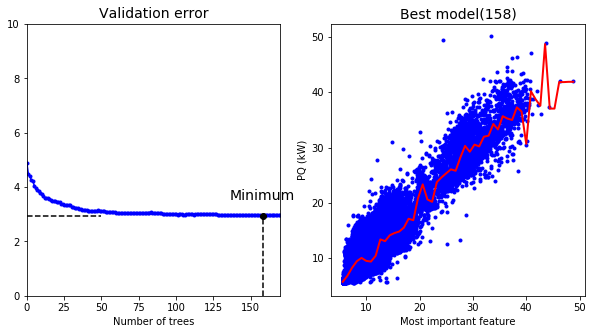

In [100]:
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.plot(errors, "b.-")
plt.plot([best_n_estimators, best_n_estimators], [0, best_MSE], "k--")
plt.plot([0, 50], [best_MSE, best_MSE], "k--")
plt.plot(best_n_estimators, best_MSE, "ko")
plt.text(best_n_estimators, best_MSE*1.2, "Minimum", ha="center", fontsize=14)
plt.axis([0, 170, 0, 10])
plt.xlabel("Number of trees")
plt.title("Validation error", fontsize=14)

plt.subplot(122)
gbrt.set_params(n_estimators=best_n_estimators).fit(X[:, 50:], y)
X_new = np.linspace(min(X[:, 50:]), max(X[:, 50:]), 50)
ypred = gbrt.predict(X_new)
plt.plot(X[:, 50:], y, "b.")
plt.plot(X_new, ypred, "r-", linewidth=2)
plt.title("Best model({})".format(gbrt.n_estimators),
          fontsize=14)
plt.xlabel("Most important feature")
plt.ylabel("PQ (kW)")
plt.show()